# Background: 
In 2006, global concern was raised over the rapid decline in the honeybee population, an integral component of American honey agriculture. Large numbers of hives were lost to Colony Collapse Disorder, a phenomenon of disappearing worker bees causing the remaining hive colony to collapse. Speculation to the cause of this disorder points to hive diseases and pesticides harming the pollinators, though no overall consensus has been reached. The U.S. used to locally produce over half the honey it consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey consumed every year originating from imports. This dataset provides insight into honey production supply and demand in America from 1998 to 2016.

# Objective: 
To visualise how honey production is changed over the years (1998-2016) in the United States. 

# Key questions to be answered:

* How has honey production yield changed from 1998 to 2016?
* Over time, what are the major production trends been across the states?
* Are there any patterns that can be observed between total honey production and value of production every year? How has value of production, which in some sense could be tied to demand, changed every year?

# Dataset:

* state: Various states of U.S.
* numcol: Number of honey-producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies that did not survive the entire year
* yieldpercol: Honey yield per colony. Unit is pounds
* totalprod: Total production (numcol x yieldpercol). Unit is pounds
* stocks: Refers to stocks held by producers. Unit is pounds
* priceperlb: Refers to average price per pound based on expanded sales. The unit is dollars.
* prodvalue: Value of production (totalprod x priceperlb). The unit is dollars.
* year: Year of production

### Import the necessary packages - pandas, numpy, seaborn, matplotlib.pyplot

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import warnings
pd.set_option('display.float_format', lambda x: '%.3f' % x) # To supress numerical display in scientific notations

### Read in the dataset

In [2]:
honeyprod = pd.read_csv("honeyproduction1998-2016.csv")

### View the first few rows of the dataset

In [3]:
honeyprod.head(10)

state     numcol  yieldpercol    totalprod       stocks  priceperlb  \
0     Alabama  16000.000           71  1136000.000   159000.000       0.720   
1     Arizona  55000.000           60  3300000.000  1485000.000       0.640   
2    Arkansas  53000.000           65  3445000.000  1688000.000       0.590   
3  California 450000.000           83 37350000.000 12326000.000       0.620   
4    Colorado  27000.000           72  1944000.000  1594000.000       0.700   
5     Florida 230000.000           98 22540000.000  4508000.000       0.640   
6     Georgia  75000.000           56  4200000.000   307000.000       0.690   
7      Hawaii   8000.000          118   944000.000    66000.000       0.770   
8       Idaho 120000.000           50  6000000.000  2220000.000       0.650   
9    Illinois   9000.000           71   639000.000   204000.000       1.190   

     prodvalue  year  
0   818000.000  1998  
1  2112000.000  1998  
2  2033000.000  1998  
3 23157000.000  1998  
4  1361000.000  1998  
5 14426000.000  1998  
6  2898000.000  1998  
7   727000.000  1998  
8  3900000.000  1998  
9   760000.000  1998

Observations: The dataset looks clean and consistent with the description provided in the Data Dictionary.

### Check the shape of the dataset

In [4]:
honeyprod.shape

(785, 8)

Observations: We have 785 observations of 8 columns

### Check the datatype of the variables to make sure that the data is read in properly

In [5]:
honeyprod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        785 non-null    object 
 1   numcol       785 non-null    float64
 2   yieldpercol  785 non-null    int64  
 3   totalprod    785 non-null    float64
 4   stocks       785 non-null    float64
 5   priceperlb   785 non-null    float64
 6   prodvalue    785 non-null    float64
 7   year         785 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 49.2+ KB


Observations: 
1. state is object data type
2. year is integer type currently. Since year is a categorical variable here, let us convert it to category data data type in Python. 
2. All the other variables are numerical and there for their python data types (float64 and int64) are ok.

### Let us analyse the quantitative variables in the dataset

In [6]:
honeyprod.describe()

numcol  yieldpercol    totalprod       stocks  priceperlb  \
count    785.000      785.000      785.000      785.000     785.000   
mean   61686.624       60.578  4140956.688  1257629.299       1.695   
std    92748.940       19.428  6884593.859  2211793.817       0.931   
min     2000.000       19.000    84000.000     8000.000       0.490   
25%     9000.000       46.000   470000.000   119000.000       1.050   
50%    26000.000       58.000  1500000.000   391000.000       1.480   
75%    65000.000       72.000  4096000.000  1380000.000       2.040   
max   510000.000      136.000 46410000.000 13800000.000       7.090   

         prodvalue     year  
count      785.000  785.000  
mean   5489738.854 2006.818  
std    9425393.878    5.492  
min     162000.000 1998.000  
25%     901000.000 2002.000  
50%    2112000.000 2007.000  
75%    5559000.000 2012.000  
max   83859000.000 2016.000

In [7]:
honeyprod.skew()

numcol        2.724
yieldpercol   0.746
totalprod     2.992
stocks        3.276
priceperlb    1.568
prodvalue     3.961
year          0.049
dtype: float64

Observations:
1. Number of colonies in every state are spread over a huge range. Ranging from 2000 to 510000.
2. The mean numcol is close to the 75% percentile of the data, indicating a right skew.
3. As expected, standard deviation of numcol is very high
4. yieldpercol - Yield per colony also has huge spread ranging from 19 pounds to 136 pounds.
5. Infact, all the variable seem to have a huge range, we will have to investigate furthur if this spread is mainly across different states or varies in the same state over the years. 

#### How many States are included in the dataset?

In [8]:
honeyprod["state"].nunique()

44

#### Which are the States that are included in this dataset?

In [9]:
honeyprod["state"].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'South Carolina'], dtype=object)

#### Calculate the average production for each state across all years

In [10]:
honeyprod[["state", "totalprod"]].groupby("state").mean().round().sort_values(by = "totalprod", ascending = False)

totalprod
state                      
North Dakota   32865000.000
California     20542895.000
South Dakota   18124263.000
Florida        15673579.000
Montana        11059211.000
Minnesota       9233263.000
Texas           7254316.000
Wisconsin       5003526.000
Michigan        4936211.000
Idaho           4124316.000
New York        3802421.000
Louisiana       3789368.000
Georgia         3362053.000
Nebraska        3096474.000
Washington      2744789.000
Wyoming         2649211.000
Arkansas        2538158.000
Oregon          2216789.000
Iowa            2008053.000
Arizona         1845158.000
Colorado        1638684.000
Mississippi     1522368.000
Pennsylvania    1192211.000
Utah            1139158.000
Ohio            1016632.000
Hawaii           966158.000
Missouri         795947.000
Alabama          726842.000
Kansas           633895.000
South Carolina   529000.000
North Carolina   527421.000
Illinois         478474.000
New Mexico       476467.000
Indiana          452842.000
Nevada           439273.000
Tennessee        400789.000
New Jersey       393947.000
Vermont          353684.000
West Virginia    295526.000
Maine            276632.000
Virginia         254579.000
Kentucky         224368.000
Maryland         211000.000
Oklahoma         201167.000

#### How many years data is provided in the dataset? And what is the starting and ending year?

In [11]:
f'This data is from {honeyprod["year"].min()} through {honeyprod["year"].max()}'

'This data is from 1998 through 2016'

#### Which State has seen highest volume in production, and in which year?

In [45]:
honeyprod[honeyprod["totalprod"]==honeyprod["totalprod"].max()]

state     numcol  yieldpercol    totalprod       stocks  \
532  North Dakota 510000.000           91 46410000.000 12995000.000   

     priceperlb    prodvalue  year  
532       1.500 69615000.000  2010

In [46]:
honeyprod[honeyprod.totalprod==honeyprod.totalprod.max()]

state     numcol  yieldpercol    totalprod       stocks  \
532  North Dakota 510000.000           91 46410000.000 12995000.000   

     priceperlb    prodvalue  year  
532       1.500 69615000.000  2010

#### What is the average yield per colony , for each year?

In [13]:
honeyprod[["year", "yieldpercol"]].groupby("year").mean().round()

yieldpercol
year             
1998       70.000
1999       65.000
2000       68.000
2001       65.000
2002       67.000
2003       63.000
2004       65.000
2005       64.000
2006       62.000
2007       59.000
2008       61.000
2009       54.000
2010       56.000
2011       55.000
2012       55.000
2013       53.000
2014       57.000
2015       55.000
2016       54.000

#### Looking at the relationship between numerical variables using pair plots and correlation plots

In [14]:
honeyprod.year = honeyprod.year.astype('category') # To convert year into categories

In [15]:
honeyprod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   state        785 non-null    object  
 1   numcol       785 non-null    float64 
 2   yieldpercol  785 non-null    int64   
 3   totalprod    785 non-null    float64 
 4   stocks       785 non-null    float64 
 5   priceperlb   785 non-null    float64 
 6   prodvalue    785 non-null    float64 
 7   year         785 non-null    category
dtypes: category(1), float64(5), int64(1), object(1)
memory usage: 44.5+ KB


C:\Users\kazayu01\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


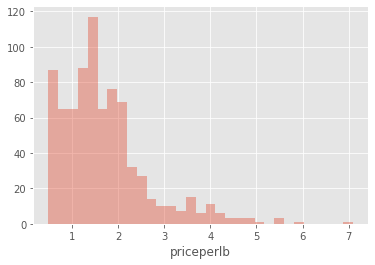

In [16]:
sns.distplot(honeyprod['priceperlb'], kde = False);

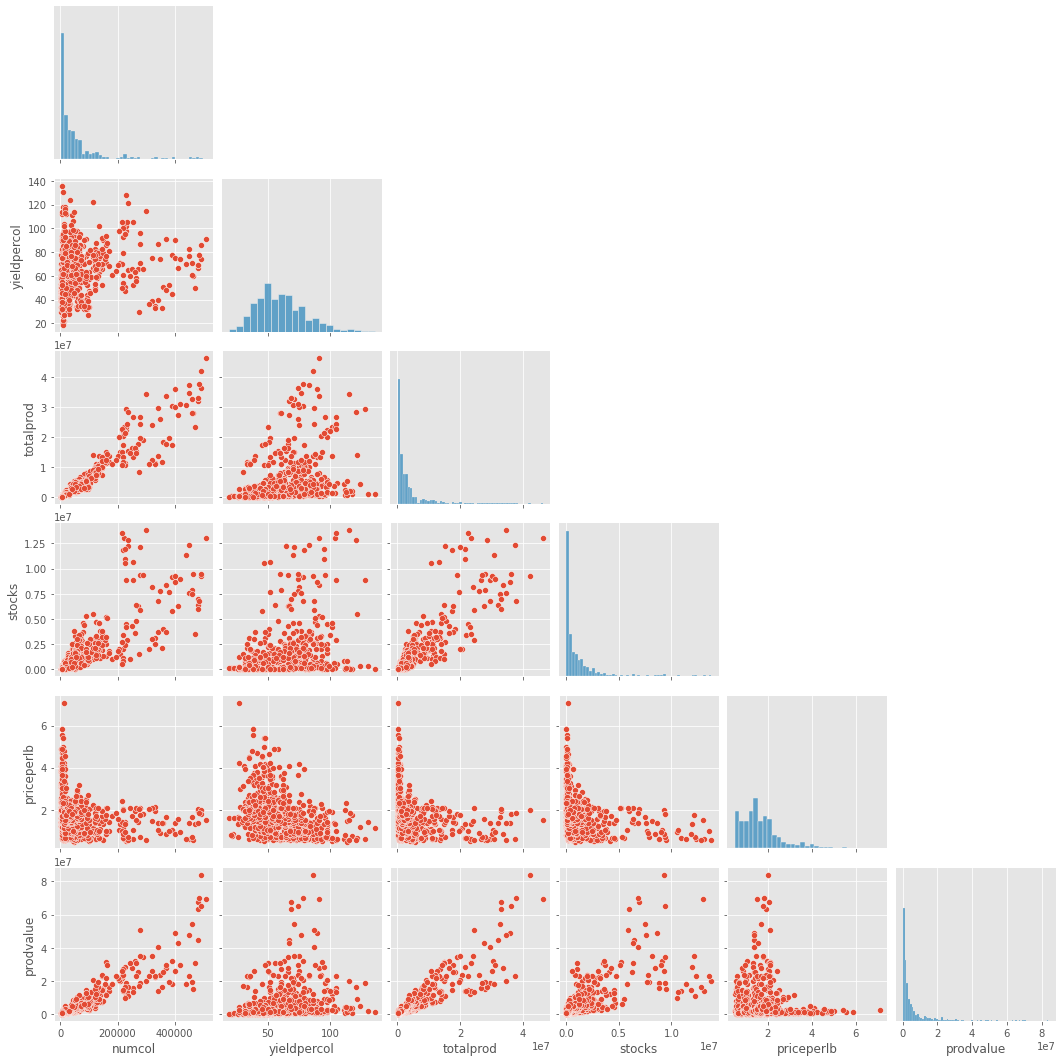

In [17]:
sns.pairplot(honeyprod, corner = True)

In [18]:
correlation = honeyprod.corr() # creating a 2-D Matrix with correlation plots
correlation

numcol  yieldpercol  totalprod  stocks  priceperlb  prodvalue
numcol        1.000        0.225      0.952   0.820      -0.211      0.899
yieldpercol   0.225        1.000      0.383   0.359      -0.361      0.256
totalprod     0.952        0.383      1.000   0.877      -0.239      0.895
stocks        0.820        0.359      0.877   1.000      -0.276      0.713
priceperlb   -0.211       -0.361     -0.239  -0.276       1.000     -0.062
prodvalue     0.899        0.256      0.895   0.713      -0.062      1.000

<AxesSubplot:>

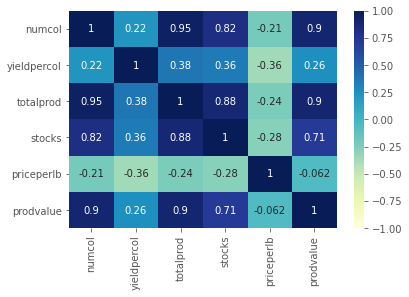

In [19]:
sns.heatmap(correlation, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)

# Uncomment the following code for information of the arguments
# help(sns.heatmap)

Observations:
1. Number of colonies have a high positive correlation with total production, stocks and the value of production. As expected, all these values are highly correlated with each other.
2. Yield per colony does not have a high correlation with any of the features that we have in our dataset. 
3. Same is the case with priceperlb.
4. Determining the factors influencing per colony yield and price per pound of honey would need furthur investigation.  

### Let us look at the overall trend of honey production in the US over the years

In [20]:
honeyprod.groupby(['year'])['totalprod'].mean().reset_index()

year   totalprod
0   1998 5105093.023
1   1999 4706674.419
2   2000 5106000.000
3   2001 4221545.455
4   2002 3892386.364
5   2003 4122090.909
6   2004 4456804.878
7   2005 4243146.341
8   2006 3761902.439
9   2007 3600512.195
10  2008 3974926.829
11  2009 3626700.000
12  2010 4382350.000
13  2011 3680025.000
14  2012 3522675.000
15  2013 3800102.564
16  2014 4421650.000
17  2015 3884400.000
18  2016 4008925.000

(0.0, 6000000.0)

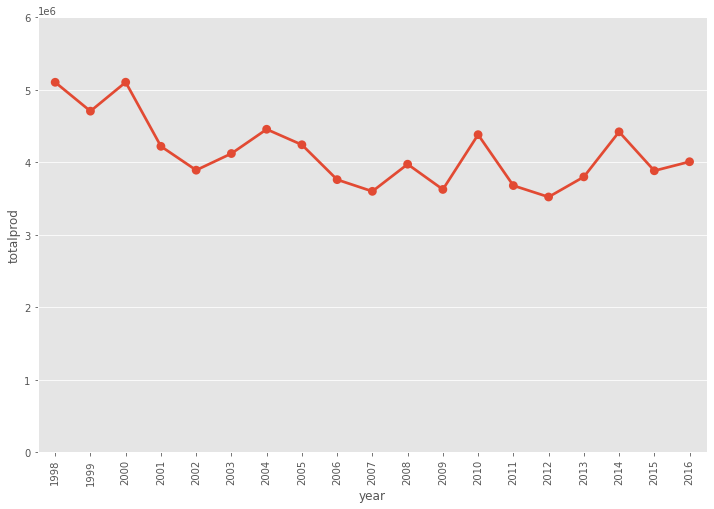

In [21]:
#from numpy import mean
plt.figure(figsize=(12,8))
sns.pointplot(x='year', y='totalprod', data=honeyprod, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.ylim(0,6000000)

# Uncomment the following code to check the actual values
# honeyprod.groupby(['year'])['totalprod'].sum().reset_index()

Observations: 
1. The overall honey production in the US has been decresing over the years.
2. Total honey production = number of colonies * average yield per colony. Let us check if the honey production is decreasing due to one of these factors or both.

### Variation in the number of colonies over the years 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1998'),
  Text(1, 0, '1999'),
  Text(2, 0, '2000'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012'),
  Text(15, 0, '2013'),
  Text(16, 0, '2014'),
  Text(17, 0, '2015'),
  Text(18, 0, '2016')])

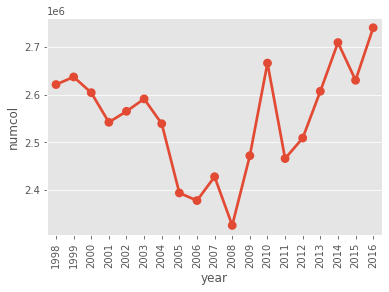

In [22]:
sns.pointplot(x='year', y='numcol', data=honeyprod, ci=None, estimator=sum)
plt.xticks(rotation=90) # To rotate the x axis labls

Observations: 
1. The number of colonies across the country shows a declining trend from 1998-2008 but has seen an uptick since 2008.
2. It is possible that there was some intervension in 2008 that help in increasing the number of honey bee colonies across the country.

### Variation of yield per colony over the years 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1998'),
  Text(1, 0, '1999'),
  Text(2, 0, '2000'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012'),
  Text(15, 0, '2013'),
  Text(16, 0, '2014'),
  Text(17, 0, '2015'),
  Text(18, 0, '2016')])

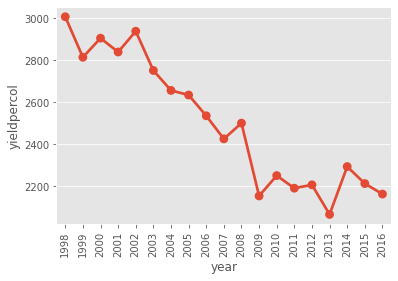

In [23]:
sns.pointplot(x='year', y='yieldpercol', data=honeyprod, estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls

Onservation: 
1. In contrast to number of colonies, the yield per colony has been decreasing since 1998.
2. This indicates that, it is not the number of colonies that is causing a decline in totalhoney production but the yield per colony.

### Let us look at the production trend at state level

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1998'),
  Text(1, 0, '1999'),
  Text(2, 0, '2000'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012'),
  Text(15, 0, '2013'),
  Text(16, 0, '2014'),
  Text(17, 0, '2015'),
  Text(18, 0, '2016')])

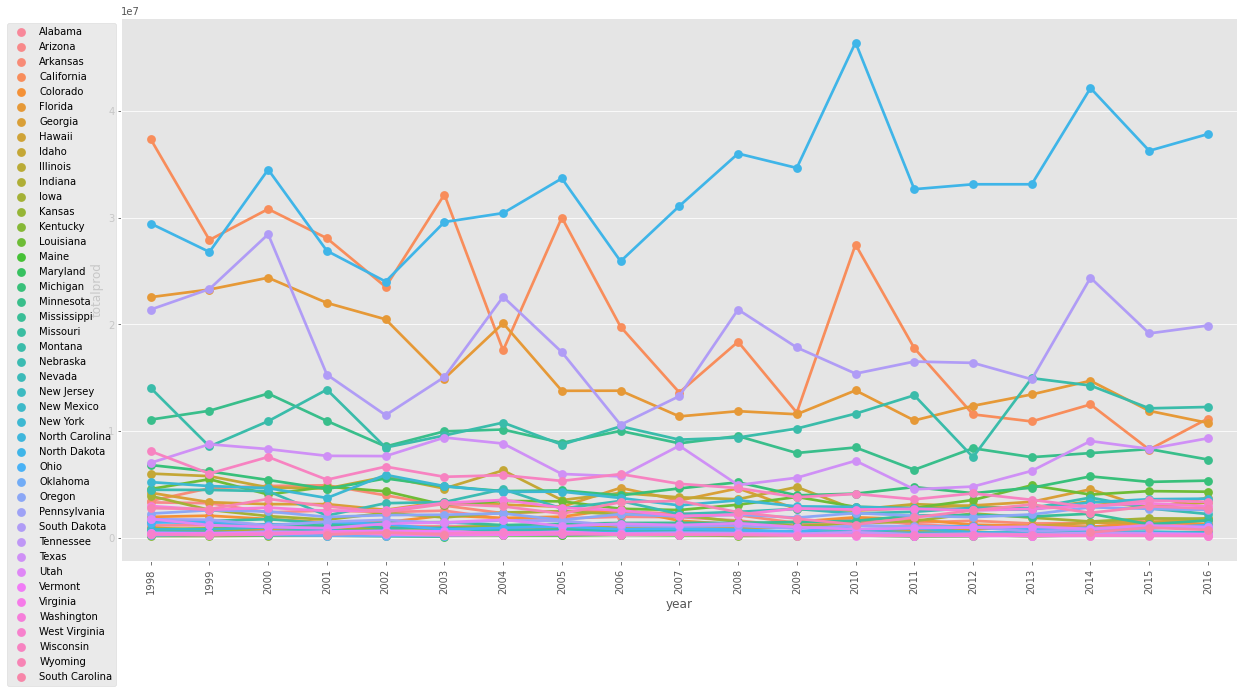

In [24]:
# Add hue parameter to the pointplot to plot for each state
plt.figure(figsize = (20,10)) # To resize the plot
sns.pointplot(x='year', y='totalprod', data=honeyprod, estimator=sum, ci=None, hue = 'state')
plt.legend(bbox_to_anchor=(0,1))
plt.xticks(rotation=90) # To rotate the x axis labls

Observations: There are some states that have much higher productions than the others but this plot is a little hard to read. Let us try plotting each state seperatly for a better understanding. 

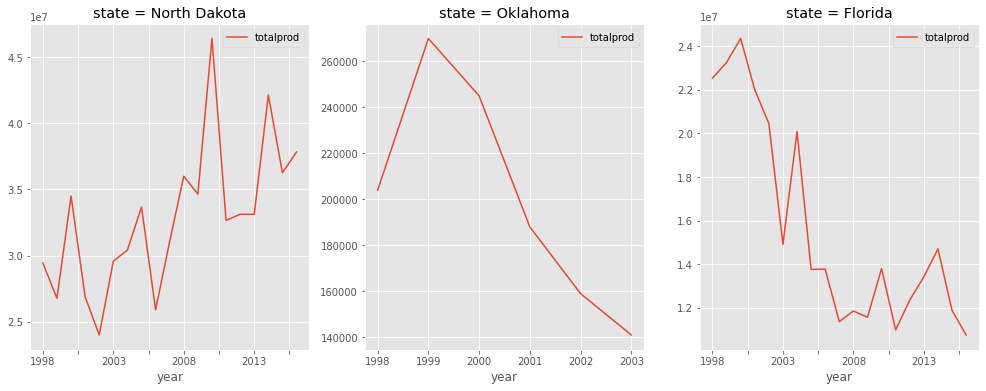

In [25]:
#### How is the production trend for each State? (USING MATPLOTLIB)?

fig, axs = plt.subplots(1,3, figsize=(17,6))
#axs=axs.ravel()
for i,s in enumerate(["North Dakota","Oklahoma","Florida"]):
    honeyprod.loc[honeyprod["state"]==s].plot("year","totalprod",ax=axs[i])
    axs[i].set_title(f'state = {s}')

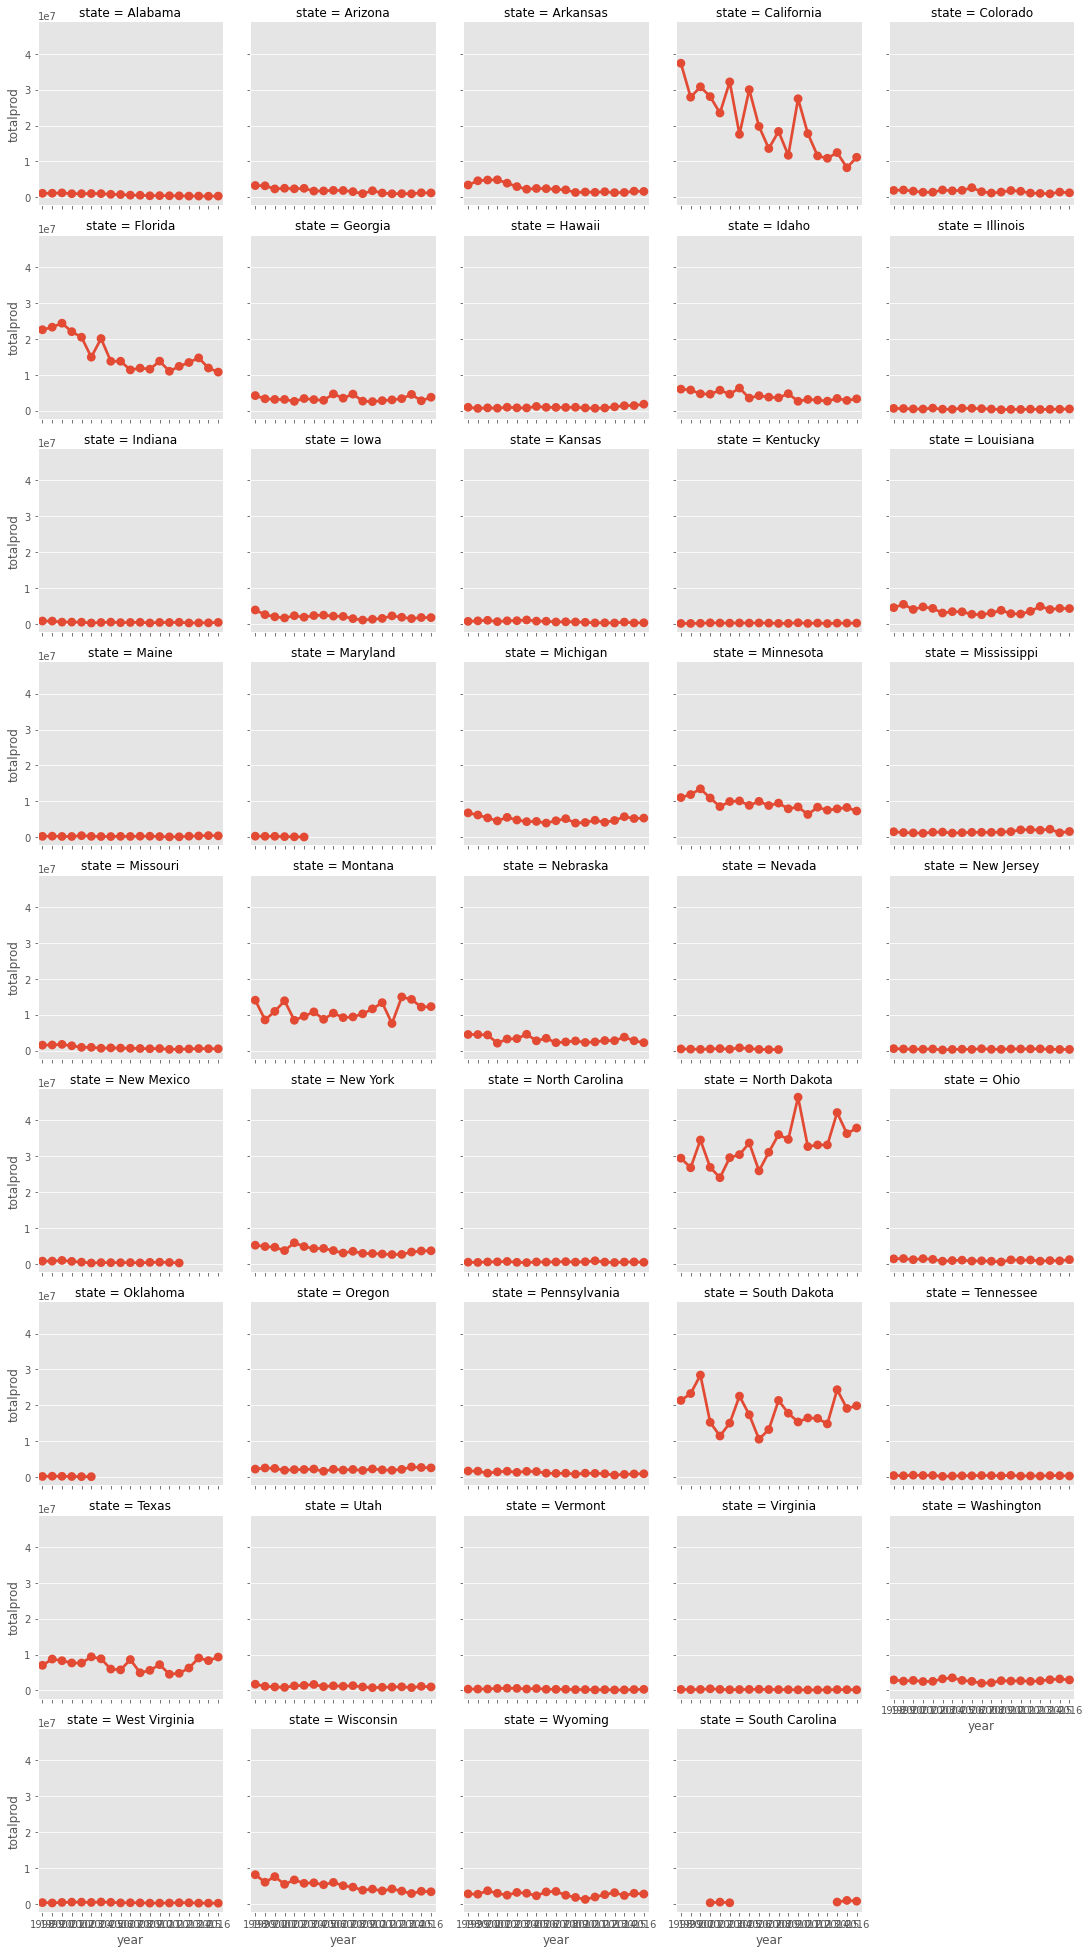

In [26]:
sns.catplot(x='year', y='totalprod', data=honeyprod,
                estimator=sum, col='state', kind="point",
                height=3,col_wrap = 5)

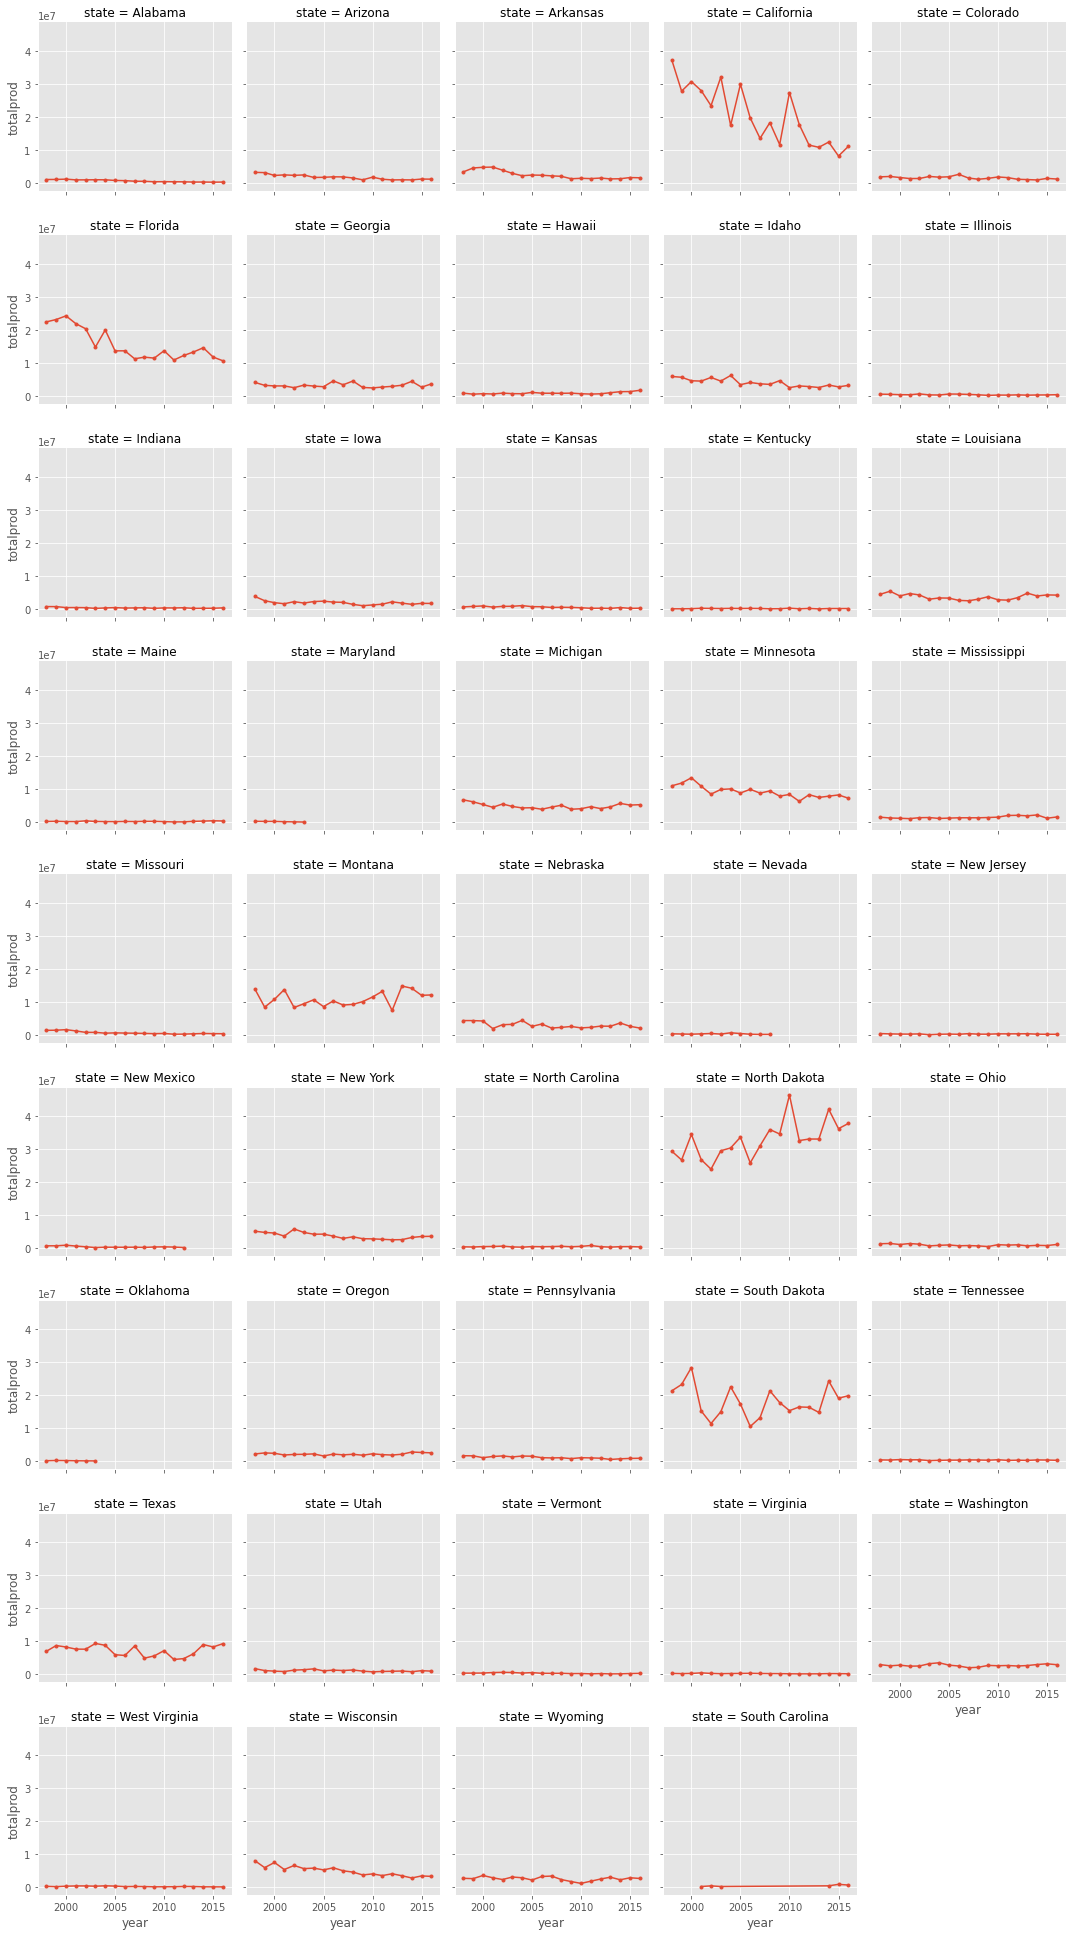

In [27]:
g = sns.FacetGrid(honeyprod, col="state", col_wrap=5, height=3)
g = g.map(plt.plot, "year", "totalprod", marker=".")

Observations: 
1. The most prominent honey producing states of US are - California, Florida, North Dakota and South Dakota and Montana
2. Unfortunately, the honey production in California has seen a steep decline over the years.
3. Florida's total production also has been on a decline. 
4. South Dakota has more of less maintained its levels of production.
5. North Dakota has actually seen an impressive increase in the honey production. 

In [28]:
# Uncomment the following code to look at the top 5 honey producing states in the US 
# honeyprod.groupby(['state'])['totalprod'].mean().sort_values(ascending = False).reset_index().head()

### Let us look at the yearly trend in number of colonies and yield per colony in these 5 states 

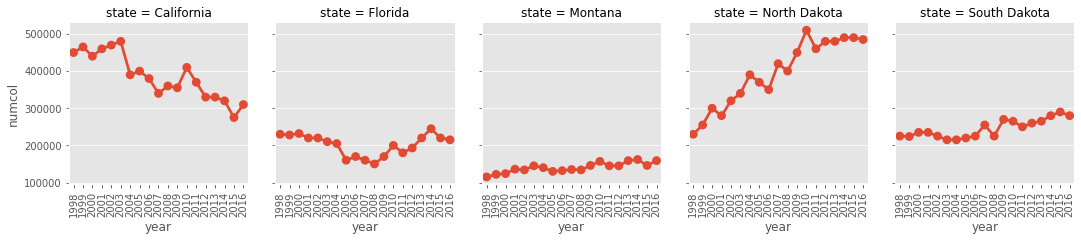

In [29]:
cplot1=sns.catplot(x='year', y='numcol', 
            data=honeyprod[honeyprod["state"].isin(["North Dakota","California","South Dakota","Florida","Montana"])],
                estimator=sum, col='state', kind="point",
                height=3,col_wrap = 5)
cplot1.set_xticklabels(rotation=90)
plt.show()

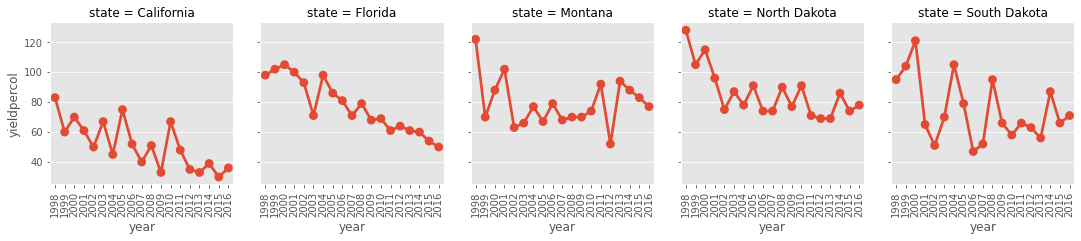

In [30]:
cplot2=sns.catplot(x='year', y='yieldpercol', 
            data=honeyprod[honeyprod["state"].isin(["North Dakota","California","South Dakota","Florida","Montana"])],
                estimator=sum, col='state', kind="point",
                height=3,col_wrap = 5)
cplot2.set_xticklabels(rotation=90)
plt.show()

Observation:
1. In North Dakota, the number of colonies has increased significantly over the years as compared to the other 4 states
2. If we check the yield per colony, it has been in an overall decreasing trend for all the 5 states over the years

### Let us see what effect, the declining production trend has had on the value of production 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1998'),
  Text(1, 0, '1999'),
  Text(2, 0, '2000'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012'),
  Text(15, 0, '2013'),
  Text(16, 0, '2014'),
  Text(17, 0, '2015'),
  Text(18, 0, '2016')])

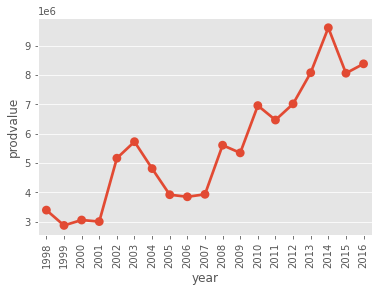

In [31]:
sns.pointplot(x="year", y="prodvalue", data=honeyprod, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls

Observations: 
1. This is an interesting trend. As the total production has declined over the years, the value of production per pound has increased over time.
2. As the supply declined, the demand has added to the value of honey.

### Let us check which of the states have been capitalising on this trend. We can compare the total production with the stocks held by the producers.

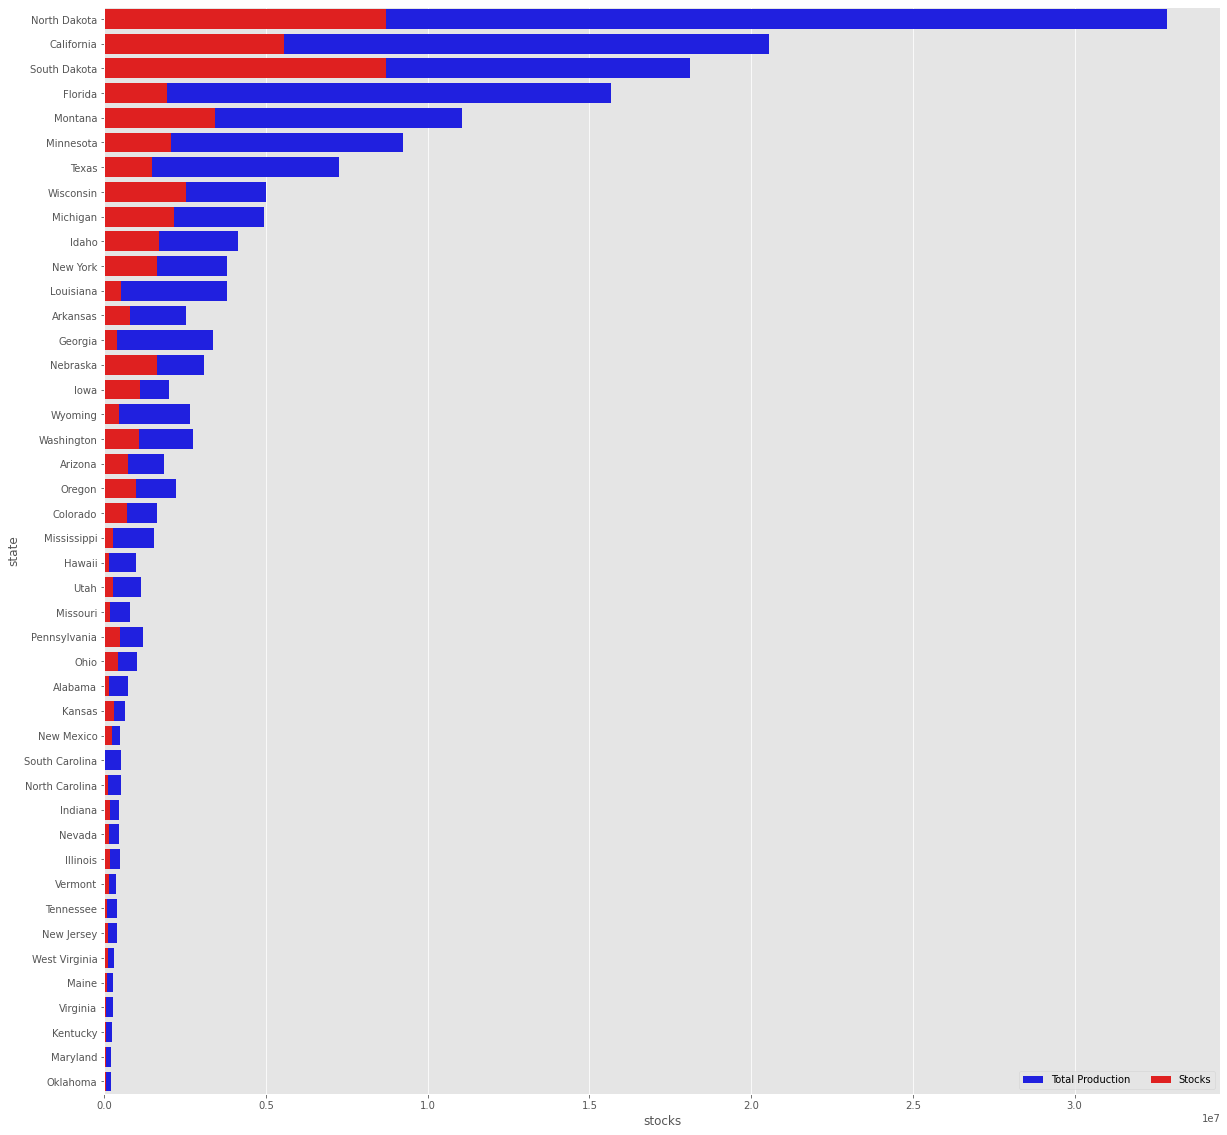

In [32]:
plt.figure(figsize = (20,20)) # To resize the plot

# Plot total production per state
sns.barplot(x="totalprod", y="state", data=honeyprod.sort_values("totalprod", ascending=False),
            label="Total Production", color="b", ci=None)

# Plot stocks per state
sns.barplot(x="stocks", y="state", data=honeyprod.sort_values("totalprod", ascending=False),
            label="Stocks", color="r", ci=None)

# Add a legend
plt.legend(ncol=2, loc="lower right", frameon=True)
plt.show()

Observations:
1. North Dakota has been able to sell more honey as compared to South Dakota despite having the highest production value.
2. Florida has the highest efficiency among the major honey producing states
3. Michigan is more efficient than Wisconsin in selling honey.

### Let us look at the spread of average price of a pound of honey

C:\Users\kazayu01\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


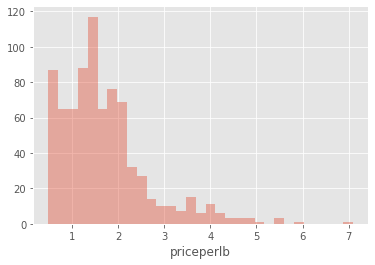

In [33]:
sns.distplot(honeyprod.priceperlb, kde=False);


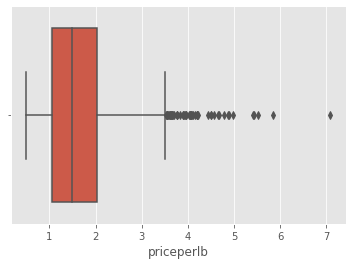

In [34]:
sns.boxplot(data = honeyprod, x = 'priceperlb');

Observations: 
1. Price per pound of honey has a right skewed distribution with a lot of outliers towards the higher end.
2. The median price per pound of honey is 1.5

### Let us look at the average price per pound of honey across states

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, 'Virginia'),
  Text(1, 0, 'South Carolina'),
  Text(2, 0, 'Illinois'),
  Text(3, 0, 'North Carolina'),
  Text(4, 0, 'Kentucky'),
  Text(5, 0, 'Tennessee'),
  Text(6, 0, 'West Virginia'),
  Text(7, 0, 'Nevada'),
  Text(8, 0, 'New Jersey'),
  Text(9, 0, 'Vermont'),
  Text(10, 0, 'Maine'),
  Text(11, 0, 'Ohio'),
  Text(12, 0, 'Indiana'),
  Text(13, 0, 'Pennsylvania'),
  Text(14, 0, 'Alabama'),
  Text(15, 0, 'Hawaii'),
  Text(16, 0, 'Missouri'),
  Text(17, 0, 'Kansas'),
  Text(18, 0, 'New York'),
  Text(19, 0, 'Maryland'),
  Text(20, 0, 'Iowa'),
  Text(21, 0, 'Wisconsin'),
  Text(22, 0, 'Michigan'),
  Text(23, 0, 'Oregon'),
  Text(24, 0, 'Oklahoma'),
  Text(25, 0, 'Washington'),
  Text(26, 0, 'Georgia'),
  Text(27, 0, 'Colorado'),
  Text(28, 0, 'Nebraska'),
  Text(29, 0, 'Utah')

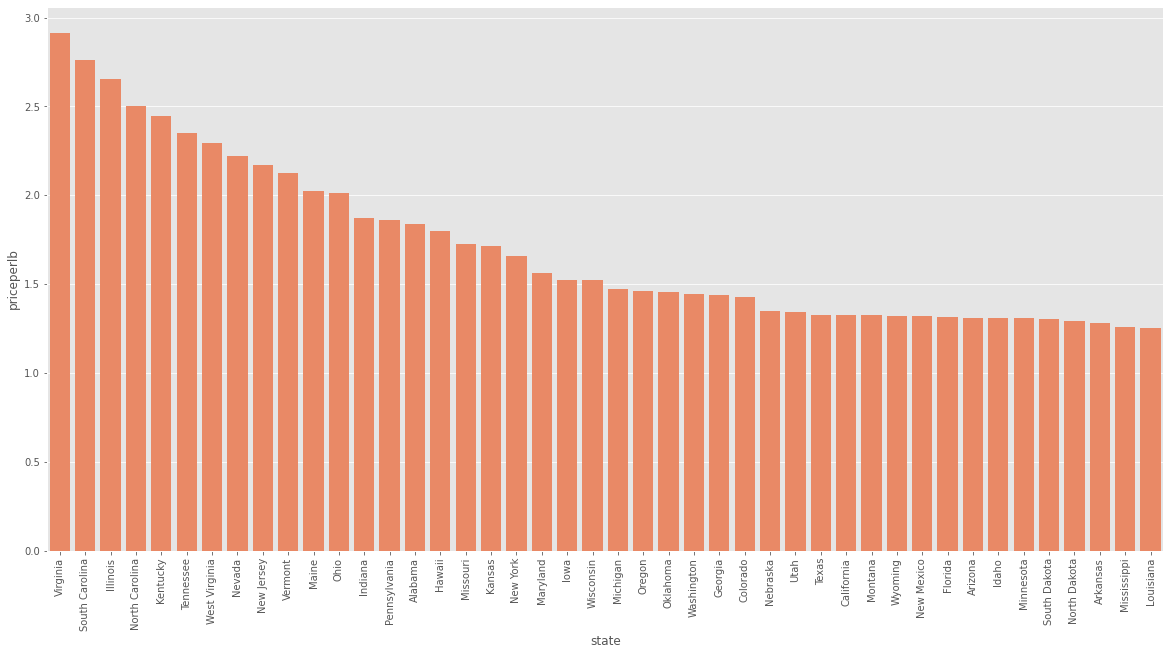

In [35]:
plt.figure(figsize = (20,10)) # To resize the plot
sns.barplot(data = honeyprod, x = "state", y = "priceperlb", ci=None, color = "coral",
            order=honeyprod.groupby('state').priceperlb.mean().sort_values(ascending = False).index)
plt.xticks(rotation=90) # To rotate the x axis lables

Observations:
1. Virginia has the highest price per pound of honey.
2. The average price per pound of honey in the major honey producing states is towards the lower end. 

### Conclusion

* We can conclude that the total honey production has declined over the years whereas the value of production per pound has increased. 
* The reason for the declined honey production is the decrease in the yield per colony over the years.
* The major honey producing states are California, Florida, North Dakota, South Dakota and Montana. 
* Among these, Florida has been very efficient in selling honey.

In [36]:
# !pip install plotly

# Interactive scatter plot using plotly package
import plotly.express as px
px.scatter(honeyprod, x = 'numcol', y = 'prodvalue', animation_frame = 'year', size = 'totalprod')

## Pandas Profiling

- auto-profile your data
- documentation: https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/
- github: https://github.com/pandas-profiling/pandas-profiling



In [43]:
# !pip install pandas-profiling==3.0.0
import pandas_profiling

profile= pandas_profiling.ProfileReport(honeyprod, title='Pandas Profiling Report')

#profile = ProfileReport(df, title='Pandas Profiling Report')
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Is there a linear relationship between the Number of Colonies & Value in Production? Check at an overall level, at state and year levels as well

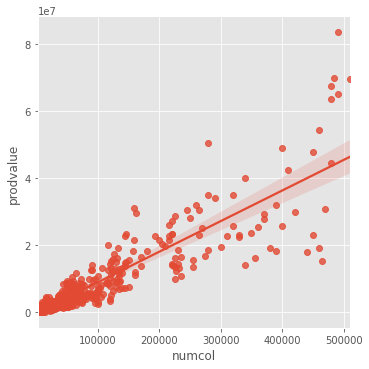

In [38]:
sns.lmplot(x="numcol", y="prodvalue", data=honeyprod)